In [1]:
import matplotlib.pyplot as plt
import numpy as np

import dataset
import tree_search
import grounder

Solution: [-1.10191719e-06  4.95679566e-07  5.39246509e-06 -1.91818305e-06
 -8.40242496e-06 -2.54333340e+01 -2.15977402e-10  1.84187314e+02
  4.62672162e-05  1.19844535e+02  6.97780701e-06  2.59929483e+01
  6.49411940e-07  1.87919387e+00]

Polynomial grounding:
	Ground coeffs: [-0.  0.  0. -0. -0. -1. -0.]
	Flip probs: [0.01433789 0.01433789 0.01433789 0.01433789 0.01433789 0.01433789
 0.01433789]

Polynomial grounding:
	Ground coeffs: [1. 0. 1. 0. 0. 0. 0.]
	Flip probs: [0.00197983 0.00197983 0.00224348 0.00197983 0.00211631 0.00197983
 0.00199086]

(((np.polyval(coeffs[0:6] * np.arange(6, 0, -1), x)) * (np.polyval(coeffs[7:14], x))) - ((np.polyval(coeffs[0:7], x)) * (np.polyval(coeffs[7:13] * np.arange(6, 0, -1), x)))) / ((np.polyval(coeffs[7:14], x))**2)


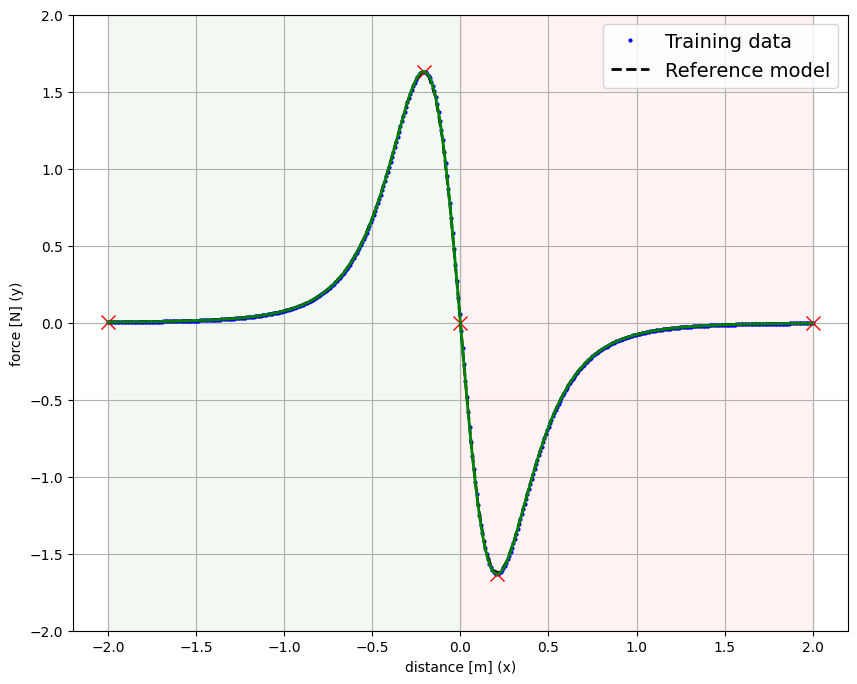

In [7]:
## for testing, let us consider the tree a/b for the 'Magman' dataset (up to the 2nd polynomial power).
S = dataset.MagmanDatasetScaled()
#S.load('data/magman.csv')
S.sample(size=500, noise=0.0, mesh=True)
stree = tree_search.OperatorSyntaxTree('/')
stree.append( tree_search.PolySyntaxTree(7) )
stree.append( tree_search.PolySyntaxTree(7) )

#grounder.BruteForceGrounder().ground(stree)
grounder.DiffGrounder(S).ground(stree)

print(f"\n{stree.lambdify_deriv()}")

S.plot()
x = np.linspace(S.xl, S.xu, 300)
plt.plot(x, stree.evaluate(x), linestyle='solid', linewidth=2, color='green', label='Data model');